# Removing Trends

## Introduction

Although the stationarity assumption is required in several time series modeling techniques, few practical time series are stationary. In this lesson we'll discuss how you can make a time series stationary. In reality, it is almost impossible to make a series perfectly stationary, but let's try to get as close as possible!

## Objectives

You will be able to:

- Compare and contrast the different methods for removing trends and seasonality in time series data 
- Use differencing to reduce non-stationarity 
- Use rolling means to reduce non-stationarity 
- Use a log transformation to minimize non-stationarity 

## Stationarity - Recap

Let's quickly re-articulate what makes a time series non-stationary. There are two major reasons behind non-stationarity of a time series: 

>**Trend**: Varying mean over time 

>**Seasonality**: Certain variations at specific time-frames 

<img src="images/new_trendseasonal.png" alt="Drawing" style="width: 800px;"/>

In the last lab, we noticed that on average, the number of air passengers was growing over time, i.e., an increase in trend. We also noticed that there was some seasonality, reflecting specific times in the year when people travel more. 

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series in order to get a stationary series. Statistical modeling techniques can then be implemented on these series. The final step would be to convert the modeled values into the original scale by applying trend and seasonality constraints back.

## Eliminating the trend

In this lecture, we'll cover three key ways to eliminate trends:
- Taking the log transformation
- Subtracting the rolling mean
- Differencing

### Log Transformation

One way to enforce stationarity can be a simple log transformation to make the time series more "uniform" over time. For example, in the plot below, we can clearly see that there is a significant positive trend, which might not be linear, or when there is a certain level of heteroscedasticity. 

The advantage of taking a log transformation is that higher values are penalized more than lower values. Alternatives for the log transformation are the square root, cube root transformations, etc. 

Let's look at our generated sales data again and compare the original plot with the log transformed plot. 

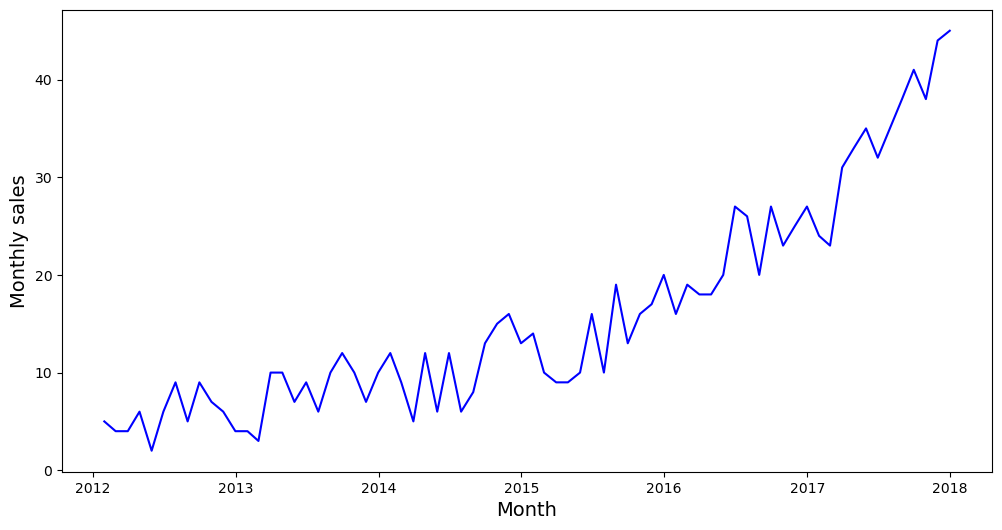

In [23]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Generated monthly sales
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
final_series = sales+bigger+6
data = pd.Series(final_series, index=index)
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly sales', fontsize=14)
plt.show()

We can use numpy's `log()` function to get the log transform of the time series and compare the output with the original time series. 

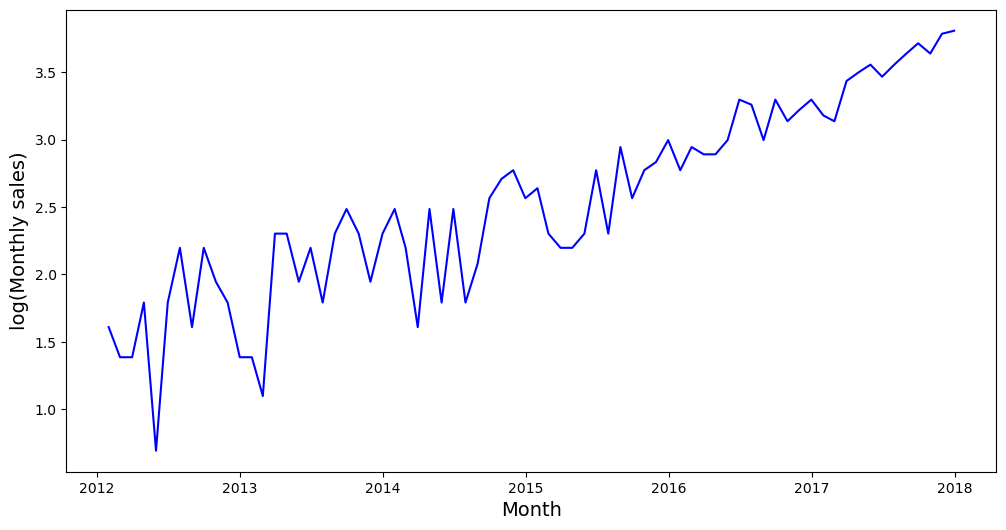

In [25]:
data = pd.Series(np.log(final_series), index=index)
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('log(Monthly sales)', fontsize=14)
plt.show()

You can notice here that this series is not stationary (yet), but taking the log did make the trend more linear, which might be a first step in the right direction. The issue is however that there seems to be more heteroscedasticity in the model now. Let's look at what happens if you take the square root of this series.

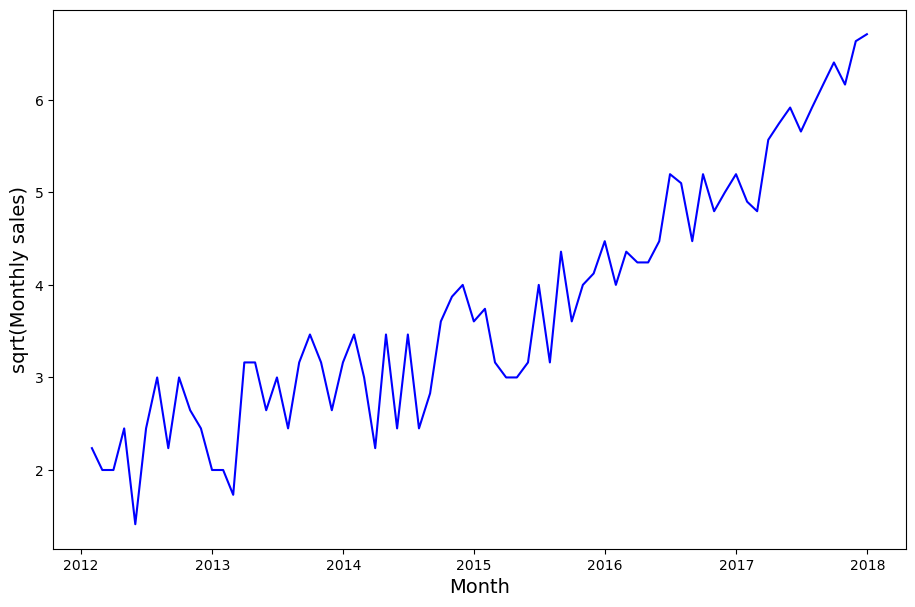

In [26]:
data = pd.Series(np.sqrt(final_series), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('sqrt(Monthly sales)', fontsize=14)
plt.show()

This looks a little better, but still not ideal in this case. You'll notice that for some data the log or square root transform is really the way to go. For now, let's move on to the next option: subtracting the rolling mean.

### Subtracting the rolling mean

#### The rolling mean

From previously, you know that you can look at the rolling mean to visually check if the mean changes over time.

The rolling mean can actually serve another purpose as well. You can calculate the rolling mean and subtract it from the time series to make sure your time series is stationary. The code to do this can be found below:

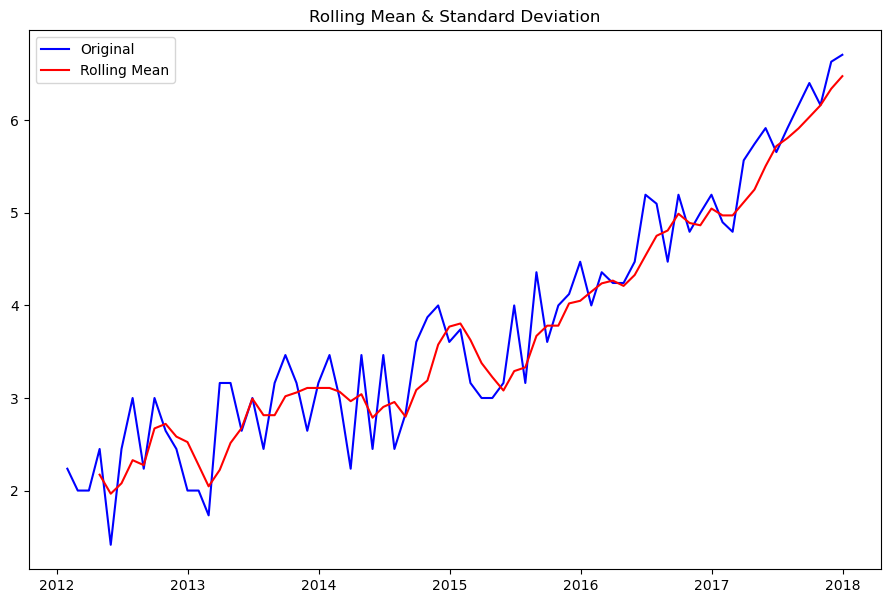

In [27]:
roll_mean = data.rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The red line shows the rolling mean. Let's subtract this from the original series. Note that since we are taking the average of the last four values, the rolling mean is not defined for the first three values. 

In [28]:
# Subtract the moving average from the original data
data_minus_roll_mean = data - roll_mean
data_minus_roll_mean.head(15)

2012-01-31         NaN
2012-02-29         NaN
2012-03-31         NaN
2012-04-30    0.278100
2012-05-31   -0.551712
2012-06-30    0.371191
2012-07-31    0.671702
2012-08-31   -0.038875
2012-09-30    0.328611
2012-10-31   -0.074704
2012-11-30   -0.133338
2012-12-31   -0.523810
2013-01-31   -0.273810
2013-02-28   -0.313334
2013-03-31    0.938696
Freq: M, dtype: float64

In [6]:
roll_mean

2012-01-31         NaN
2012-02-29         NaN
2012-03-31         NaN
2012-04-30    2.171389
2012-05-31    1.965926
                ...   
2017-08-31    5.913357
2017-09-30    6.035118
2017-10-31    6.162008
2017-11-30    6.341300
2017-12-31    6.477248
Freq: M, Length: 72, dtype: float64

In [29]:
data

2012-01-31    2.236068
2012-02-29    2.000000
2012-03-31    2.000000
2012-04-30    2.449490
2012-05-31    1.414214
                ...   
2017-08-31    6.164414
2017-09-30    6.403124
2017-10-31    6.164414
2017-11-30    6.633250
2017-12-31    6.708204
Freq: M, Length: 72, dtype: float64

In [10]:
# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

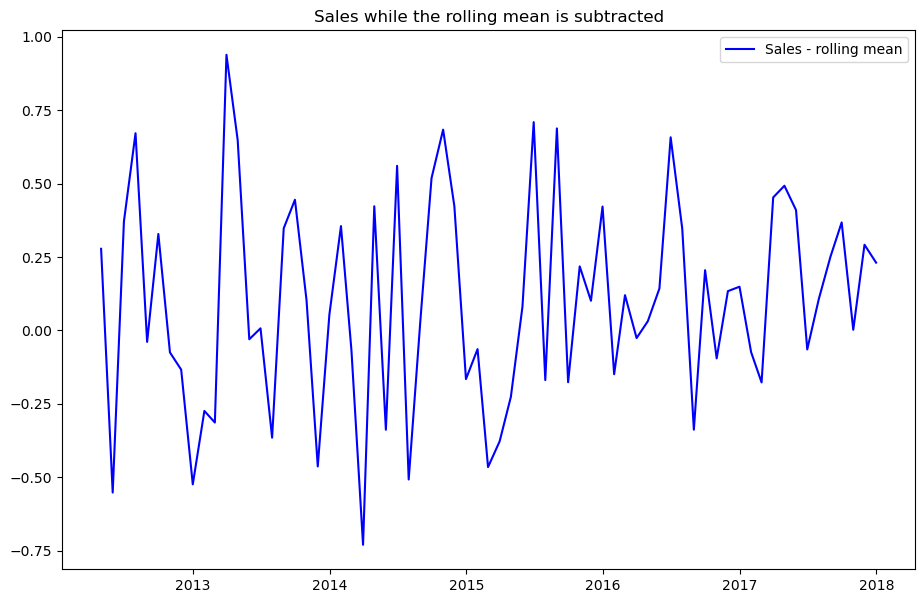

In [11]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

This seems to be more or less stationary! Note that you can change the window length, which will affect what your eventual time series will look like. You'll experiment with this in the lab!

#### The weighted rolling mean

A drawback of the rolling mean approach is that the window has to be strictly defined. In this case, we can take yearly averages but in complex situations like forecasting a stock price, it may be difficult to come up with an exact number. So we take a "weighted rolling mean" (or weighted moving average, WMA for short) where more recent values are given a higher weight. There are several techniques for assigning weights. A popular one is **Exponentially Weighted Moving Average** where weights are assigned to all the previous values with an exponential decay factor. This can be implemented in Pandas with `.ewm()` method. Details can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html).

Note that here the parameter `halflife` is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay. These definitions are discussed in the link shared above.

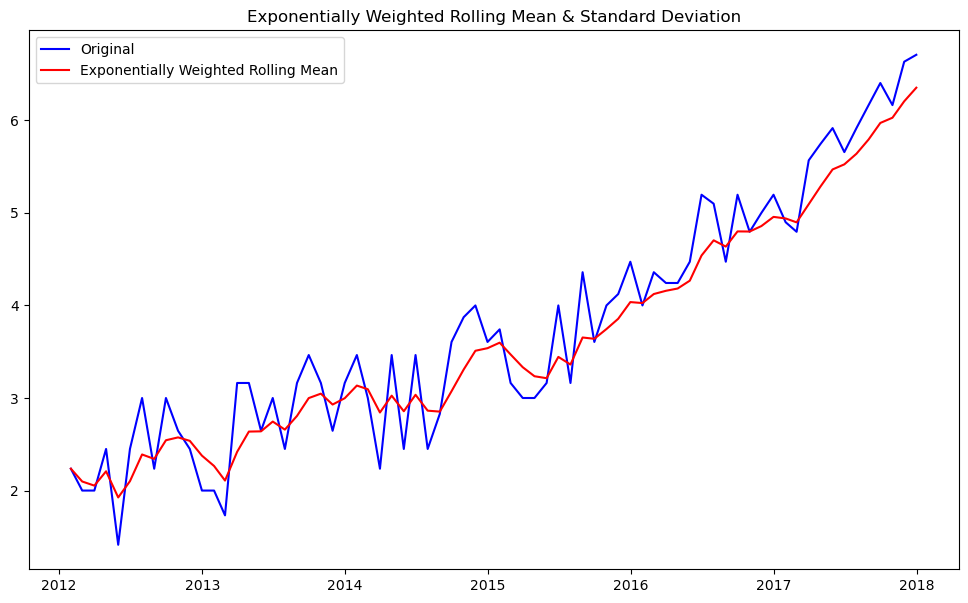

In [12]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average
exp_roll_mean = data.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [13]:
# Subtract the moving average from the original data
data_minus_exp_roll_mean = data - exp_roll_mean
data_minus_exp_roll_mean.head(15)

2012-01-31    0.000000
2012-02-29   -0.097783
2012-03-31   -0.053479
2012-04-30    0.241359
2012-05-31   -0.511451
2012-06-30    0.348483
2012-07-31    0.610154
2012-08-31   -0.105735
2012-09-30    0.456502
2012-10-31    0.071338
2012-11-30   -0.087508
2012-12-31   -0.377218
2013-01-31   -0.265499
2013-02-28   -0.375975
2013-03-31    0.743754
Freq: M, dtype: float64

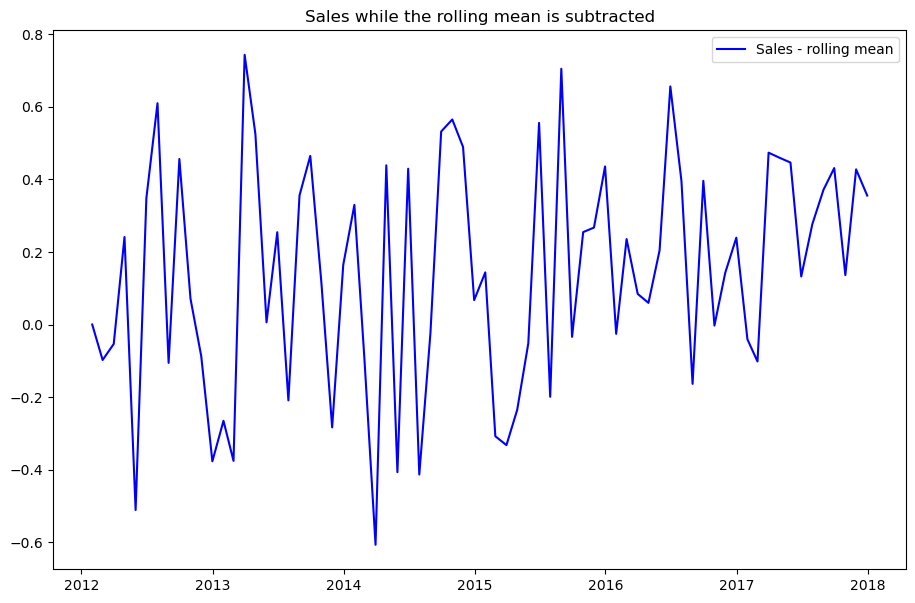

In [14]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

For our sales data, subtracting the weighted mean does not seem to have a better effect than simply subtracting the rolling mean. Still, this might be better in some cases. 

### Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag"). 

This mostly works pretty well in improving stationarity. First-order differencing can be done in Pandas using the `.diff()` method with `periods=1` (denoting a 1-period lag). Details on `.diff()` can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html).

In [31]:
data_diff = data.diff(periods=1)
data_diff.head(10)

2012-01-31         NaN
2012-02-29   -0.236068
2012-03-31    0.000000
2012-04-30    0.449490
2012-05-31   -1.035276
2012-06-30    1.035276
2012-07-31    0.550510
2012-08-31   -0.763932
2012-09-30    0.763932
2012-10-31   -0.354249
Freq: M, dtype: float64

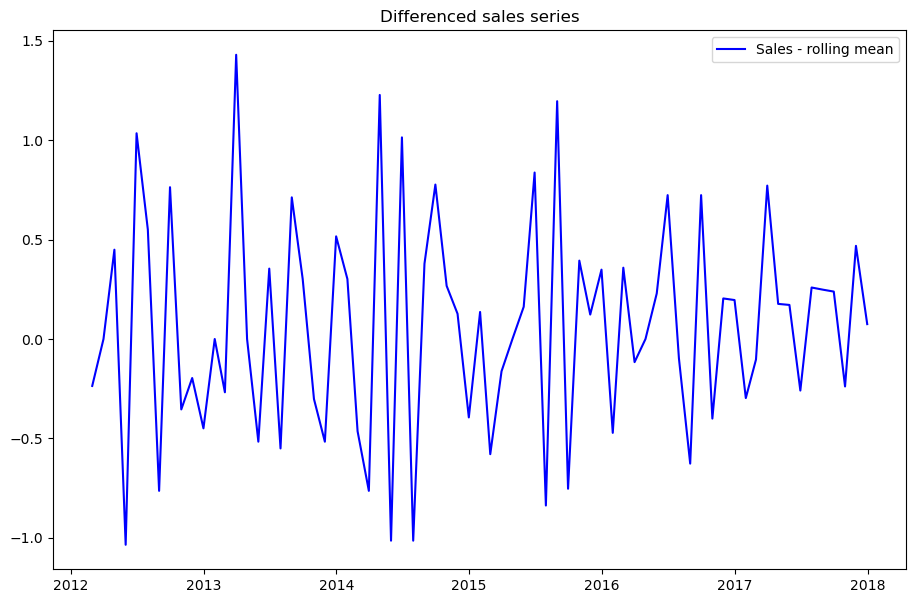

In [32]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [36]:
data_diff2 = data_diff.diff(periods=1)
data_diff2.head(10)

2012-01-31         NaN
2012-02-29         NaN
2012-03-31    0.236068
2012-04-30    0.449490
2012-05-31   -1.484766
2012-06-30    2.070552
2012-07-31   -0.484766
2012-08-31   -1.314442
2012-09-30    1.527864
2012-10-31   -1.118181
Freq: M, dtype: float64

This seems to work pretty well if you want to make the series stationary!

Differencing is a very popular tool to remove seasonal trends from time series. Let's circle back to the temperatures time series we have been working with in this section. 

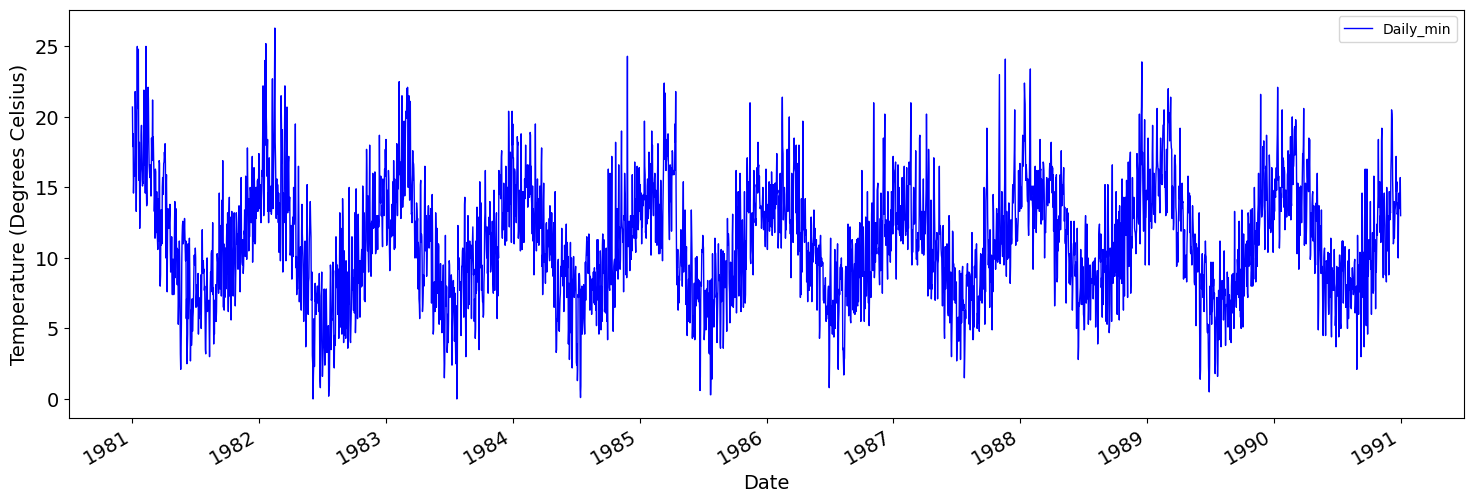

In [37]:
data = pd.read_csv('min_temp.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')
data.set_index('Date', inplace=True)

data.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (Degrees Celsius)', fontsize=14);

In [38]:
data

,Daily_min
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


Here, we differenced our temperature data by taking differences of exactly one year, which removes the cyclical seasonality from the time series data! Pretty magical!

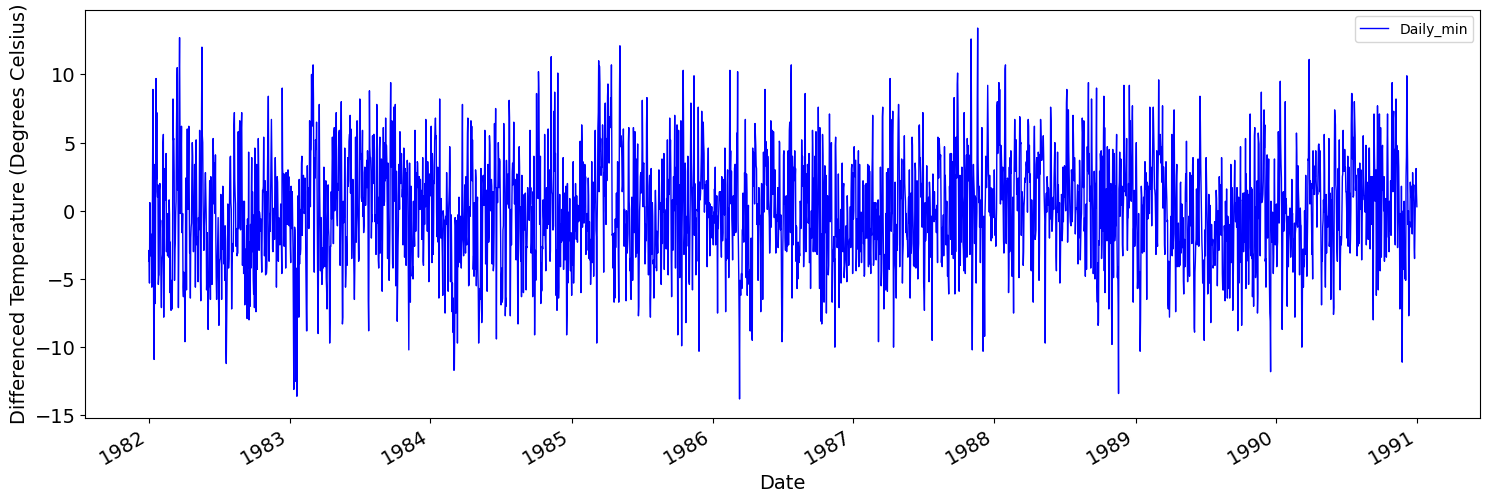

In [19]:
data_diff = data.diff(periods=365)
data_diff.dropna(inplace=True)
data_diff.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Differenced Temperature (Degrees Celsius)', fontsize=14);

In [21]:
# Adfuller test
from statsmodels.tsa.stattools import adfuller

adfuller(data_diff)

(-19.0365321470661,
 0.0,
 5,
 3279,
 {'1%': -3.4323458605158654,
  '5%': -2.8624218526902547,
  '10%': -2.567239428686678},
 17214.006818380265)

## Summary 

In this lab, you learned some techniques such as log transforms, rolling means, and differencing to make time series data stationary through. Time for you to get some hands-on practice! 